In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.94G/9.94G [01:29<00:00, 119MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [23]:
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [ ]:
!pip install kagglehub --quiet

import kagglehub
import os

# Download the dataset (This will print the path where it was downloaded)
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
print("Path to dataset files:", path)

# Construct the train_dir path based on the downloaded dataset path
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')

# Now try to list the directory contents
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Path to dataset files: /kaggle/input/the-wildfire-dataset
Number of Classes: 2
Classes: ['nofire', 'fire']


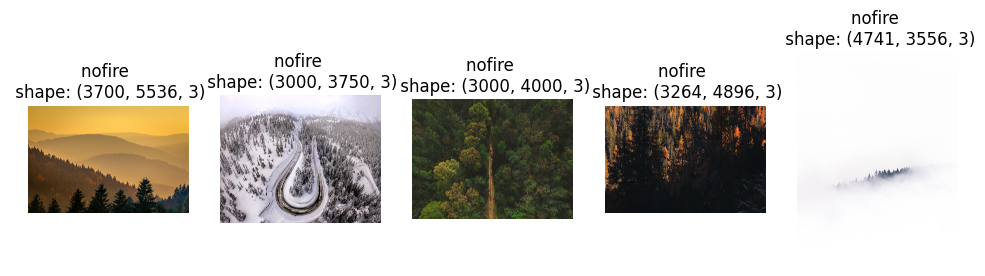

In [ ]:
import matplotlib.pyplot as plt
import os


train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'

import kagglehub
if not os.path.exists(train_dir):
    path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
    train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')

classes = os.listdir(train_dir)

plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

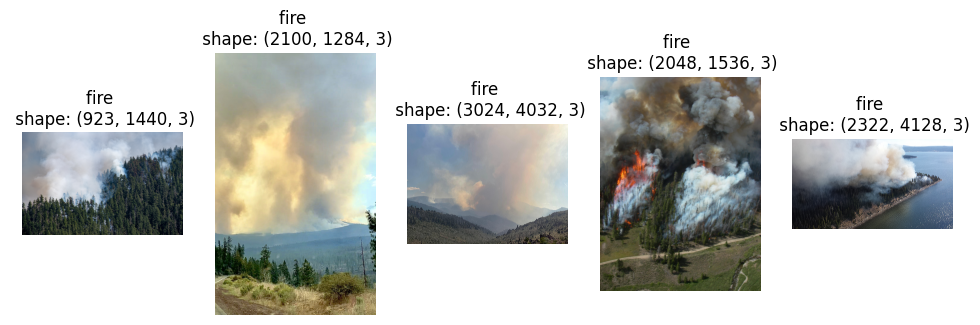

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import kagglehub

# Download the dataset using kagglehub and get its path
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

# Construct paths using os.path.join and downloaded path
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

# Print the paths to verify
print("Train Directory:", train_dir)
print("Validation Directory:", val_dir)
print("Test Directory:", test_dir)

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Train Directory: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train
Validation Directory: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val
Test Directory: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test
Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
class_mapping = train_generator.class_indices
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [ ]:
from tensorflow.keras.models import Sequential # Importing the Sequential class
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define img_width and img_height
img_width = 128  # Set to your desired width
img_height = 128 # Set to your desired height

model = Sequential([
        Input(shape=(img_width, img_height, 3)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import kagglehub

# Download the dataset using kagglehub and get its path
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

# Construct paths using os.path.join and downloaded path
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

# Print the paths to verify
print("Train Directory:", train_dir)
print("Validation Directory:", val_dir)
print("Test Directory:", test_dir)

# Define img_width, img_height, and batch_size before creating generators
img_width = 128  # Set to your desired width
img_height = 128 # Set to your desired height
batch_size = 32   # Set to your desired batch size


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
# This step is crucial and was missing in your original code
model.compile(optimizer='adam', # You can choose a different optimizer if needed
              loss='binary_crossentropy', # Use appropriate loss for binary classification
              metrics=['accuracy']) # You can add other metrics like precision, recall, etc.

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Train Directory: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train
Validation Directory: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val
Test Directory: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test
Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
 2/58 ━━━━━━━━━━━━━━━━━━━━ 4:33 5s/step - accuracy: 0.5078 - loss: 0.8948  

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


43/58 ━━━━━━━━━━━━━━━━━━━━ 1:48 7s/step - accuracy: 0.5858 - loss: 0.7148

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 523s 9s/step - accuracy: 0.6054 - loss: 0.6858 - val_accuracy: 0.7057 - val_loss: 0.5357
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6562 - loss: 0.7190

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6562 - loss: 0.7190 - val_accuracy: 0.7005 - val_loss: 0.5349
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 505s 8s/step - accuracy: 0.7502 - loss: 0.4977 - val_accuracy: 0.7318 - val_loss: 0.5163
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7500 - loss: 0.5437 - val_accuracy: 0.7135 - val_loss: 0.5260
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 566s 9s/step - accuracy: 0.7619 - loss: 0.4830 - val_accuracy: 0.7708 - val_loss: 0.4553
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8125 - loss: 0.3873 - val_accuracy: 0.7760 - val_loss: 0.4460
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 503s 8s/step - accuracy: 0.7750 - loss: 0.4618 - val_accuracy: 0.7865 - val_loss: 0.4397
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8438 - loss: 0.3505 - val_accuracy: 0.7943 - val_loss: 0.4251
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 462s 8s/step - accuracy: 0.8143 - loss: 0.4112 - val_accuracy: 0.8099 - val_loss: 0.4181

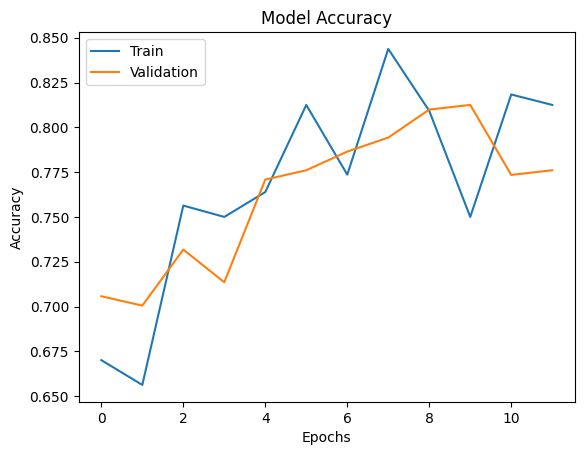

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

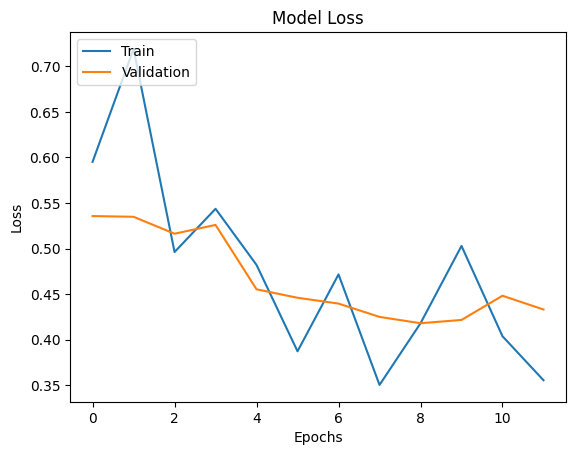

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 2/12 ━━━━━━━━━━━━━━━━━━━━ 1:08 7s/step - accuracy: 0.7812 - loss: 0.4868

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 100s 8s/step - accuracy: 0.8000 - loss: 0.4309


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Test Accuracy: 0.8203


In [ ]:
model.save('FFD.keras')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np # Import numpy and assign it the alias 'np'
import matplotlib.pyplot as plt

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) # Now 'np' is defined
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

Path to dataset files: /kaggle/input/the-wildfire-dataset


['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


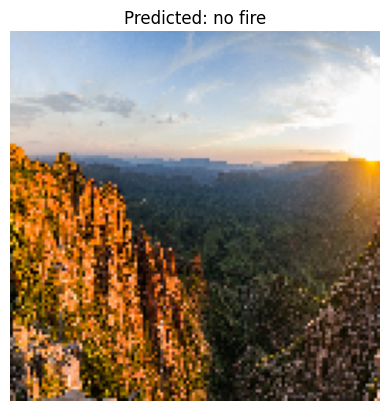

In [28]:
!pip install kagglehub --quiet
import kagglehub
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Download the dataset if it doesn't exist locally
dataset_path = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3'  # Assuming version 3 is used
if not os.path.exists(dataset_path):
    kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

# Load the model
model = load_model('FFD.keras')

# Function to predict fire
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(128, 128))  # Use the same target_size as during training
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = "fire"  # Assuming class_names[1] is "fire"
  else:
    predicted_class = "no fire" # Assuming class_names[0] is "no fire"

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

# Get a path to a "no fire" image from the dataset
no_fire_img_path = os.path.join(dataset_path, 'the_wildfire_dataset_2n_version', 'test', 'nofire', '35554264024_b33afa21ac_o.jpg')

# Call the prediction function with the path to the image
predict_fire(no_fire_img_path)
